## EDA

O objetivo do notebook de EDA é compreender as características gerais e específicas, manipular e estruturar novos dados.

##### Imports and configuration

In [1]:
# Imports
import sys
import pandas as pd
from dotenv import load_dotenv 

sys.path.append('../')
load_dotenv()

from functions.eda import (
    describe_data,
    distribution_graphs,
    calculate_unique_values
)

# Configuration
pd.set_option('display.max_rows', 100)

##### Data preparation

In [26]:
# Load data
book_data = pd.read_csv('../test_data/books_data.csv')
book_rating_data = pd.read_csv('../test_data/Books_rating.csv')

In [3]:
# Book data information
# book_data.info()
book_data[0:3]

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN


In [4]:
# Book ratings information
# book_rating_data.info()
book_rating_data[0:3]

,Id,Title,Price,User_id,profileName,score,time,summary,text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."


In [5]:
# Data check
# book_data[100:200]
# book_data.head(100)
# book_data.tail(100)

# book_rating_data[100:200]
# book_rating_data.head(100)
# book_rating_data.tail(100)

#### Exploração quantitativa

Contagens, distribuições e verificações gerais

In [6]:
# Display described book data
pd.set_option('display.float_format', lambda x: '%.2f' % x)
describe_data(book_data)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_values
Title,212403,212403,Its Only Art If Its Well Hung!,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
description,143962,133226,Unlike some other reproductions of classic tex...,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68442
authors,180991,127278,['Rose Arny'],236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31413
image,160329,149387,http://books.google.com/books/content?id=7dMSA...,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52075
previewLink,188568,188099,http://books.google.com/books?id=acwPAgAAQBAJ&...,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23836
publisher,136518,16016,Simon and Schuster,3454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75886
publishedDate,187099,11582,2000,4286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25305
infoLink,188568,184506,https://play.google.com/store/books/details?id...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23836
categories,171205,10883,['Fiction'],23419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41199
ratingsCount,49752.00,NaN,NaN,NaN,21.25,201.34,1.00,1.00,2.00,5.00,4895.00,162652


In [7]:
# Display described book rating data
describe_data(book_rating_data)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_values
Id,3000000,221998,B000IEZE3G,6796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Title,2999792,212403,The Hobbit,22023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208
Price,481171.00,NaN,NaN,NaN,21.76,26.21,1.00,10.78,14.93,23.95,995.00,2518829
User_id,2438213,1008972,A14OJS0VWMOSWO,5795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,561787
profileName,2438095,854145,Midwest Book Review,5817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,561905
score,3000000.00,NaN,NaN,NaN,4.22,1.20,1.00,4.00,5.00,5.00,5.00,0
time,3000000.00,NaN,NaN,NaN,1132306772.63,149320187.53,-1.00,999907200.00,1128297600.00,1269129600.00,1362355200.00,0
summary,2999593,1592314,Great Book,6848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407
text,2999992,2062648,digital books are perfect and easy to use! The...,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


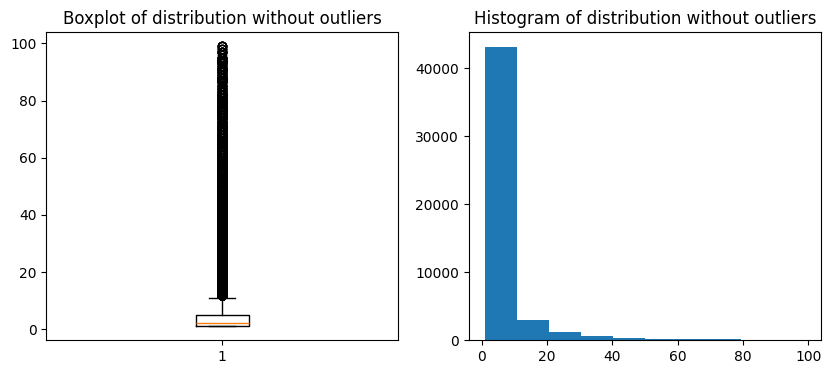

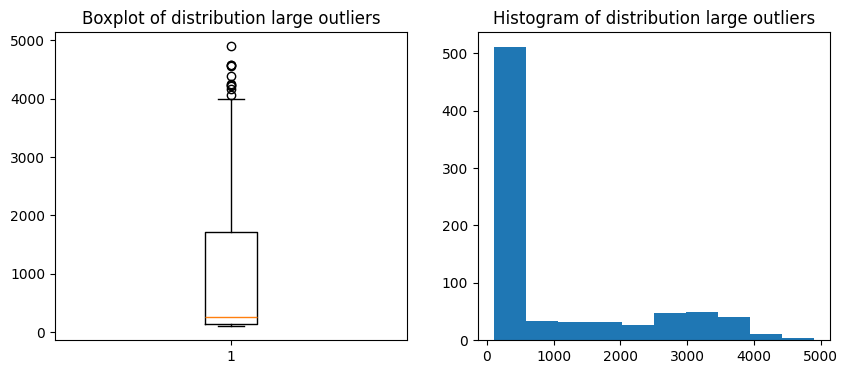

In [8]:
# Checks for distributions graphs
mode = ['above', 'below']
threshold_low = 100
threshold_high = 100

distribution_graphs(book_data['ratingsCount'], threshold=threshold_low, mode=mode[1])
distribution_graphs(book_data['ratingsCount'], threshold=threshold_high, mode=mode[0])

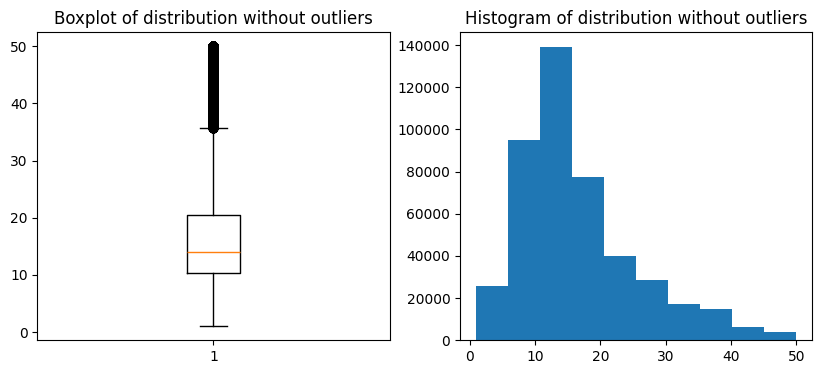

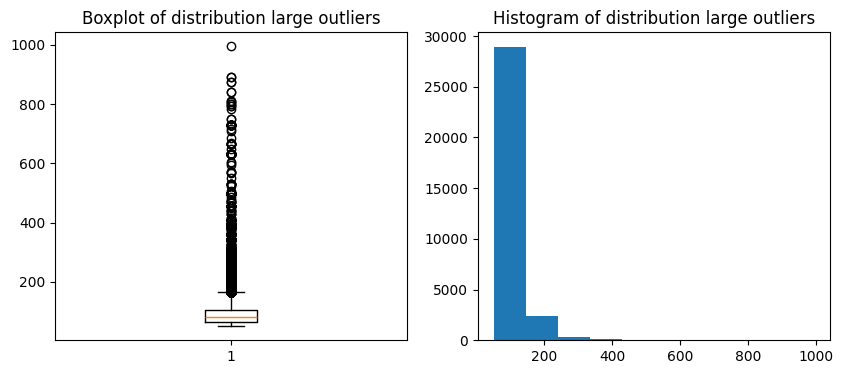

In [9]:
# Checks for distributions graphs
mode = ['above', 'below']
threshold_low = 50
threshold_high = 50

distribution_graphs(book_rating_data['Price'], threshold=threshold_low, mode=mode[1])
distribution_graphs(book_rating_data['Price'], threshold=threshold_high, mode=mode[0])

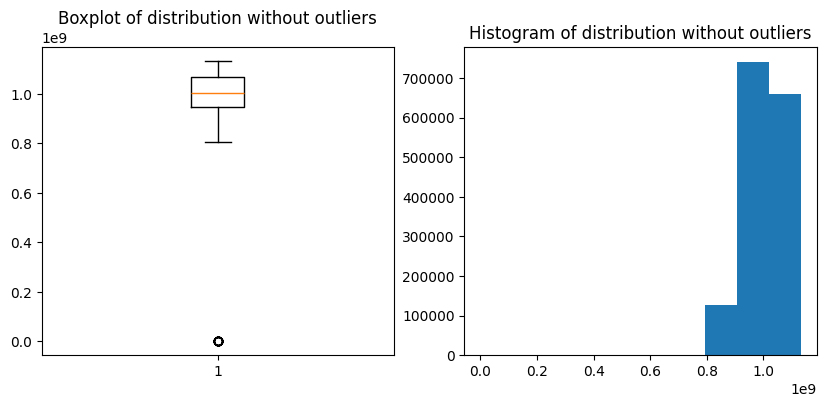

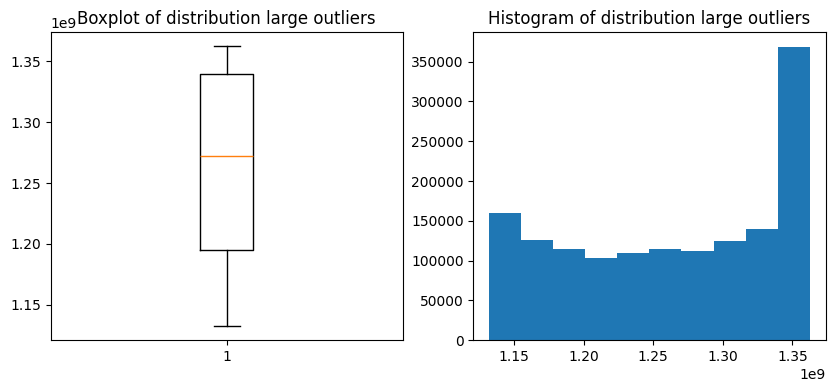

In [10]:
# Checks for distributions graphs
mode = ['above', 'below']
threshold_low = book_rating_data['time'].mean()
threshold_high = book_rating_data['time'].mean()

distribution_graphs(book_rating_data['time'], threshold=threshold_low, mode=mode[1])
distribution_graphs(book_rating_data['time'], threshold=threshold_high, mode=mode[0])

In [42]:
# Check for unique values and proportions
categories_list = ['authors','publisher','categories']
calculate_unique_values(book_data,categories_list[2])

,Value,Frequency,Percentage
0,['Fiction'],23419,11.03
1,['Religion'],9459,4.45
2,['History'],9330,4.39
3,['Juvenile Fiction'],6643,3.13
4,['Biography & Autobiography'],6324,2.98
...,...,...,...
10878,"['Authors, Japanese']",1,0.00
10879,['Birth certificates'],1,0.00
10880,['Restaurant management'],1,0.00
10881,['Oxford (England)'],1,0.00


In [41]:
# Check for unique values and proportions
categories_list = ['Title','User_id','profileName','score']
calculate_unique_values(book_rating_data,categories_list[3])

,Value,Frequency,Percentage
0,5.00,1807343,60.24
1,4.00,585616,19.52
2,3.00,254295,8.48
3,1.00,201688,6.72
4,2.00,151058,5.04


<Axes: >

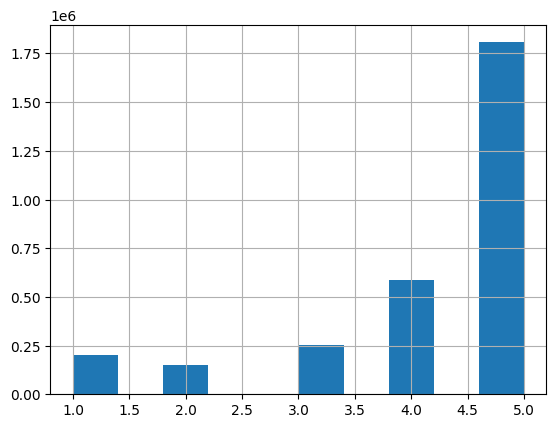

In [50]:
book_rating_data['score'].hist(bins=10)

#### Texto

Verificações de variáveis de texto

In [27]:
# Get the length of the title and description from book data
book_data['Title_length'] = book_data['Title'].apply(lambda x: len(str(x)) if pd.notnull(x) else None)
book_data['Description_length'] = book_data['description'].apply(lambda x: len(str(x)) if pd.notnull(x) else None)

In [31]:
# Get the length of the summary and text from book rating data
book_rating_data['summary_length'] = book_rating_data['summary'].apply(lambda x: len(str(x)) if pd.notnull(x) else None)
book_rating_data['text_length'] = book_rating_data['text'].apply(lambda x: len(str(x)) if pd.notnull(x) else None)

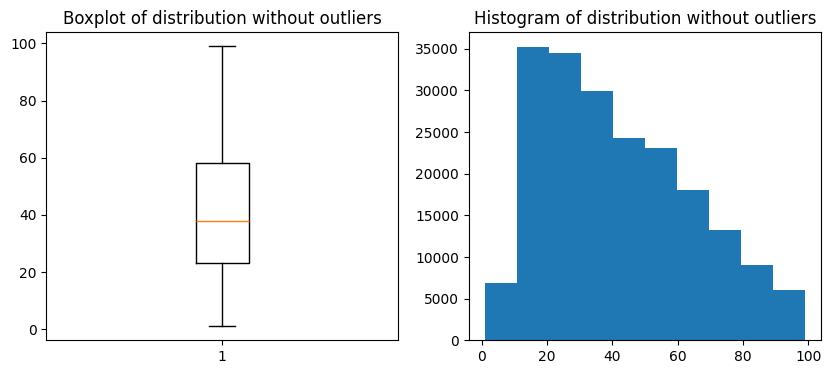

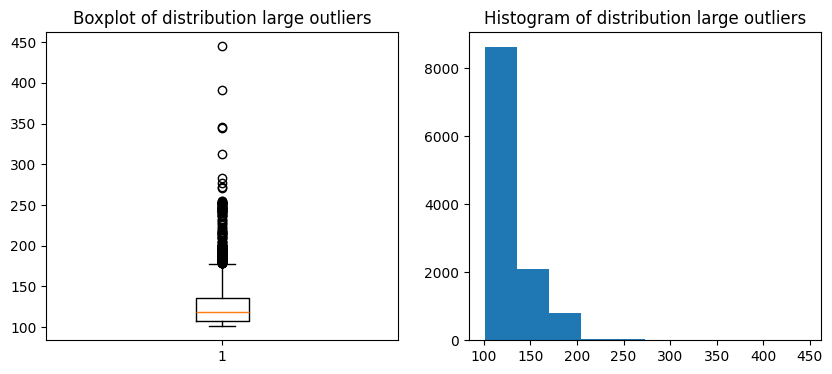

In [33]:
# Checks for distributions graphs
mode = ['above', 'below']
threshold_low = 100
threshold_high = 100

distribution_graphs(book_data['Title_length'], threshold=threshold_low, mode=mode[1])
distribution_graphs(book_data['Title_length'], threshold=threshold_high, mode=mode[0])

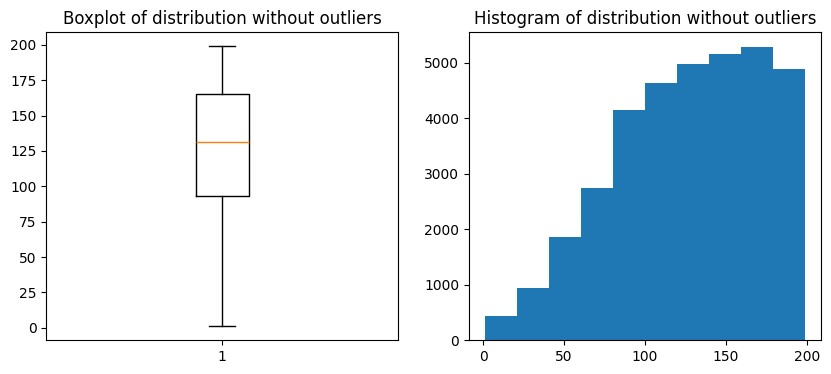

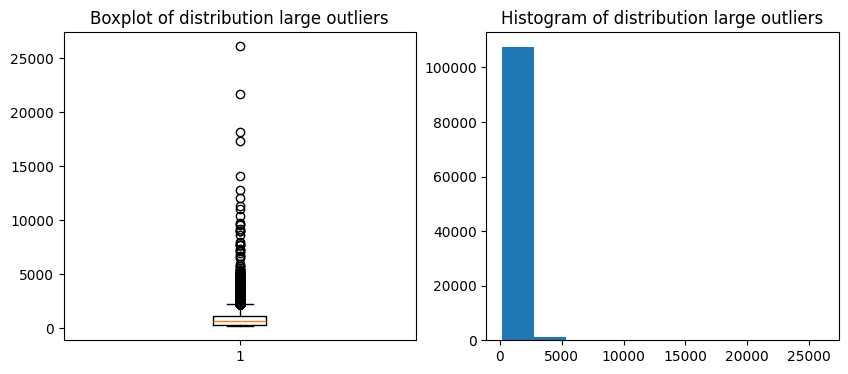

In [35]:
# Checks for distributions graphs
mode = ['above', 'below']
threshold_low = 200
threshold_high = 200

distribution_graphs(book_data['Description_length'], threshold=threshold_low, mode=mode[1])
distribution_graphs(book_data['Description_length'], threshold=threshold_high, mode=mode[0])

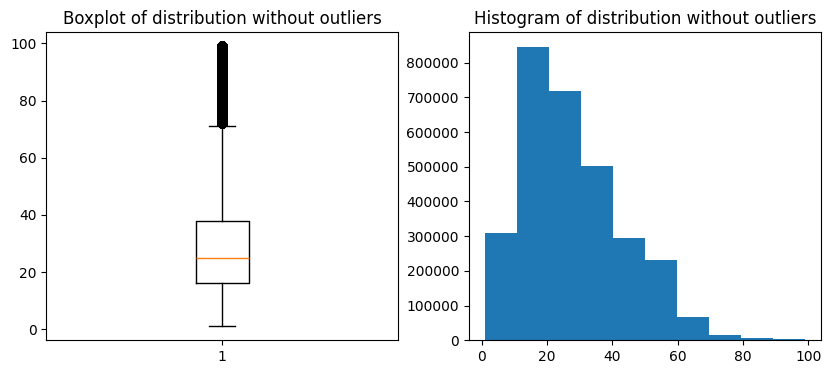

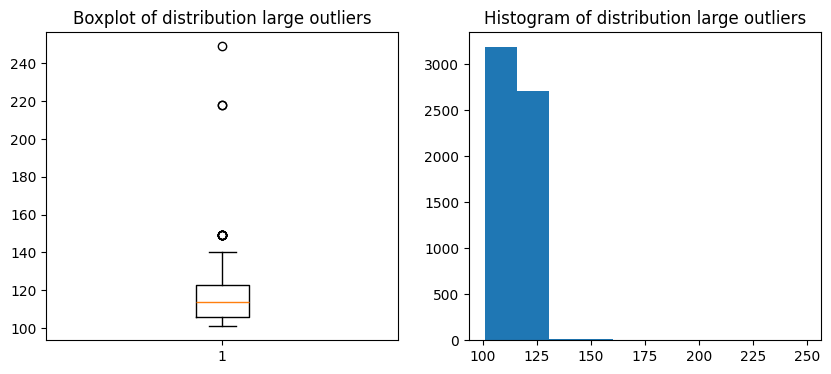

In [36]:
# Checks for distributions graphs
mode = ['above', 'below']
threshold_low = 100
threshold_high = 100

distribution_graphs(book_rating_data['summary_length'], threshold=threshold_low, mode=mode[1])
distribution_graphs(book_rating_data['summary_length'], threshold=threshold_high, mode=mode[0])

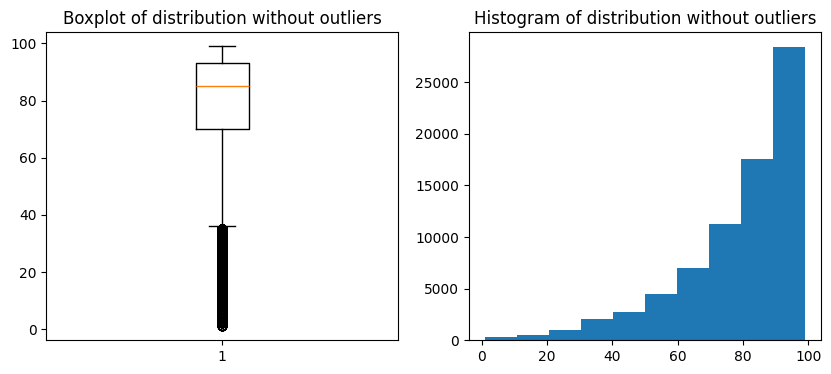

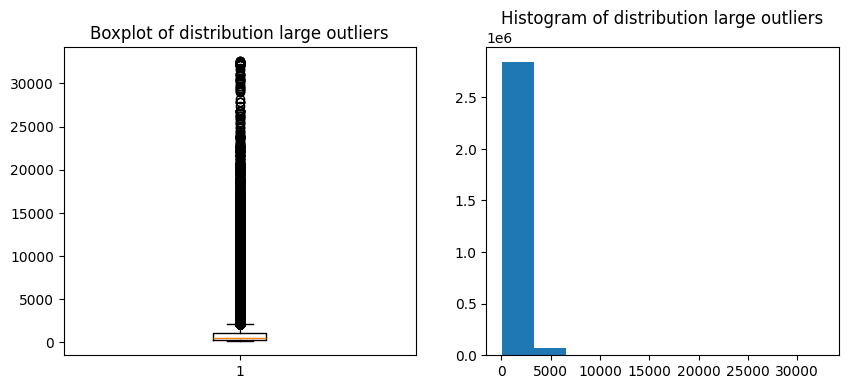

In [37]:
# Checks for distributions graphs
mode = ['above', 'below']
threshold_low = 100
threshold_high = 100

distribution_graphs(book_rating_data['text_length'], threshold=threshold_low, mode=mode[1])
distribution_graphs(book_rating_data['text_length'], threshold=threshold_high, mode=mode[0])